In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [20]:
df_labels = pd.read_csv('csvjoinv2/circlelonghubandspoke+v+97+l+2.join.node.csv')
df_features = pd.read_csv('../../network_specs/circlelonghubandspoke+v+97+l+2.specs.csv', sep=';')

#df_features.drop(columns='state', inplace=True)

In [21]:
df_labels['State'] = np.where(
    df_labels['State'] == 'Recovered',
    0,
    1
)

In [22]:
df_labels['State'].value_counts()

0    9632
1      68
Name: State, dtype: int64

In [23]:
df_labels['Id'].value_counts()

p51    100
p90    100
p78    100
p48    100
p31    100
      ... 
p81    100
p5     100
p96    100
p2     100
p68    100
Name: Id, Length: 97, dtype: int64

In [24]:
df_no_recover_proba = df_labels.groupby('Id')['State'].mean().reset_index(drop=False)
df_no_recover_proba

,Id,State
0,p0,0.00
1,p1,0.01
2,p10,0.00
3,p11,0.00
4,p12,0.00
...,...,...
92,p92,0.03
93,p93,0.00
94,p94,0.01
95,p95,0.00


In [25]:
df_data = df_no_recover_proba.merge(
    df_features,
    on='Id',
    how='left'
)

In [26]:
df_data['binary_state'] = df_data['State'] > 0.0

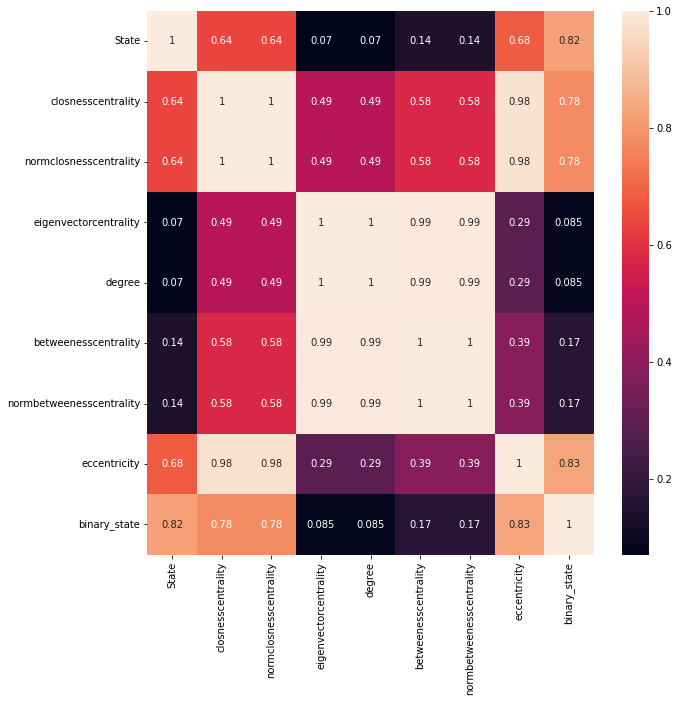

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(df_data.corr()), annot=True)
plt.show()

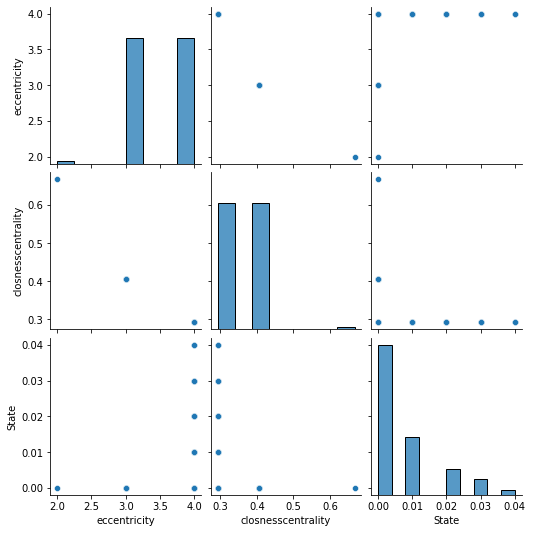

In [28]:
sns.pairplot(
    data=df_data[
        ['eccentricity',
         'closnesscentrality',
         #'eigenvectorcentrality',
         'State'
        ]
    ]
)

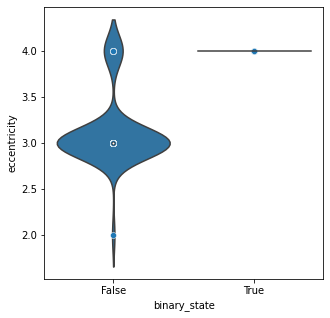

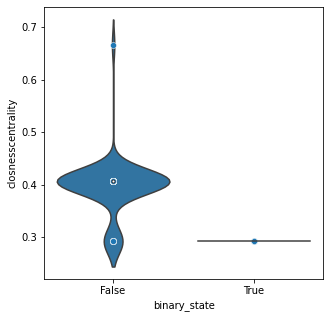

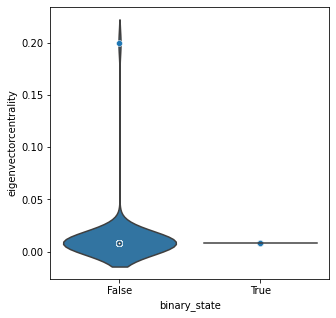

In [29]:
for col in ['eccentricity',
         'closnesscentrality',
         'eigenvectorcentrality']:
    plt.figure(figsize=(5,5))
    sns.violinplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    sns.scatterplot(
        data=df_data,
        y=col,
        x='binary_state'
    )
    plt.show()

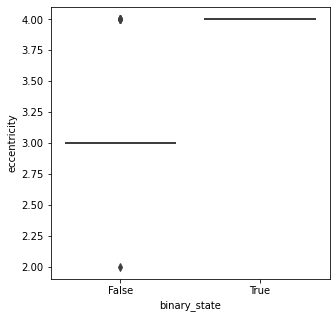

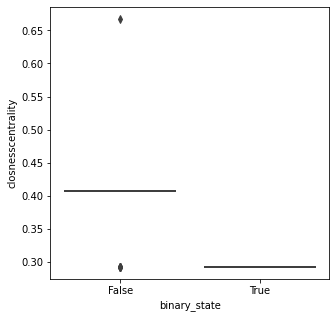

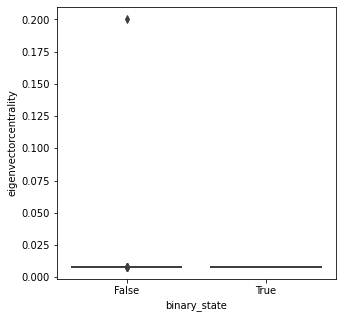

In [30]:
for col in ['eccentricity',
         'closnesscentrality',
         'eigenvectorcentrality']:
    plt.figure(figsize=(5,5))
    sns.boxplot(
        data=df_data,
        y=col,
        x='binary_state',
        notch=True
    )
    plt.show()

In [31]:
joined_result_folder = '../joined_boxplot'

if not os.path.exists(joined_result_folder):
    os.mkdir(joined_result_folder)
    
df_data.to_pickle(f'{joined_result_folder}/circle_longhubandspoke.pkl')

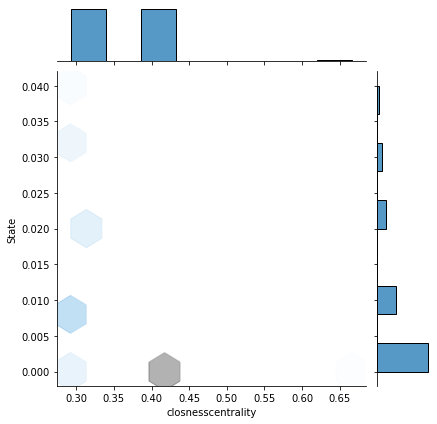

In [39]:
sns.jointplot(
    data=df_data,
    x='closnesscentrality',
    y='State',
   # hue='binary_state',
    alpha=0.3,
    kind="hex"
    #kind="reg",
     #logx=True
)
    
    

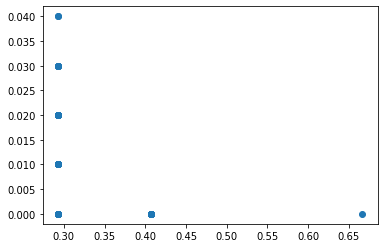

In [38]:
plt.scatter(
    x=df_data['closnesscentrality'],
    y=df_data['State'],
)
#plt.ylim([0, 1])